# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Loading the dataset

In [3]:
df=pd.read_csv(r"C:\Users\Kunal\OneDrive\Desktop\Pythonprac\Projects\Eda\Prime Videos\amazon_prime_titles.csv")
df.head(5)

show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, International   
2  March 30, 2021          2017    NaN   74 min  Action, Drama, Suspense   
3  March 30, 2021          2014    NaN   69 min              Documentary   
4  March 30, 2021          1989    NaN   45 min           Drama, Fantasy   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man discovers his wife is cheating on ...  
3  Pink breaks the mold once again, bringing her ...  
4  Teenage Matt Banting wants to work with a famo...

# Basic information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
df.describe(include="object")

show_id   type                title     director            cast  \
count     9668   9668                 9668         7585            8435   
unique    9668      2                 9668         5773            7927   
top         s1  Movie  The Grand Seduction  Mark Knight  Maggie Binkley   
freq         1   7814                    1          113              56   

              country      date_added rating  duration listed_in  \
count             672             155   9331      9668      9668   
unique             86              84     24       219       518   
top     United States  March 30, 2021    13+  1 Season     Drama   
freq              253              14   2117      1342       986   

                                              description  
count                                                9668  
unique                                               9414  
top     Arpo was designed as a commando robot, built a...  
freq                                                   15

# Inspecting the null values in dataset

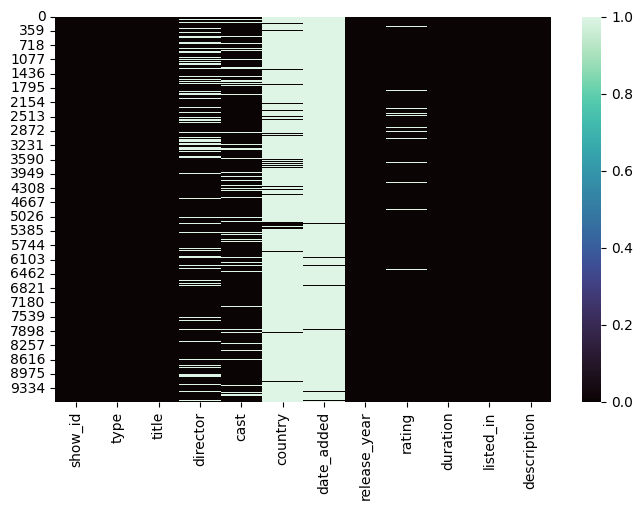

In [6]:
plt.figure(figsize=(8, 5))
sb.heatmap(df.isnull(), cmap='mako')
plt.show()

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

# Data Cleaning

In [8]:
df.cast.replace(np.nan,"Unavilable",inplace=True)
df.rating.fillna(df.rating.mode()[0],inplace=True)
df.director.fillna("Unavailable",inplace=True)

# Dropping the Extra columns

In [9]:
df.drop("show_id",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)

In [10]:
df.head()

type                 title        director  \
0  Movie   The Grand Seduction    Don McKellar   
1  Movie  Take Care Good Night    Girish Joshi   
2  Movie  Secrets of Deception     Josh Webber   
3  Movie    Pink: Staying True  Sonia Anderson   
4  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  
0  March 30, 2021          2014    13+  113 min            Comedy, Drama  
1  March 30, 2021          2018    13+  110 min     Drama, International  
2  March 30, 2021          2017    13+   74 min  Action, Drama, Suspense  
3  March 30, 2021          2014    13+   69 min              Documentary  
4  March 30, 2021          1989    13+   45 min           Drama, Fantasy

# Renaming the column name

In [11]:
df.rename({"listed_in":"category"},axis=1,inplace=True)

In [12]:
df.head(5)

type                 title        director  \
0  Movie   The Grand Seduction    Don McKellar   
1  Movie  Take Care Good Night    Girish Joshi   
2  Movie  Secrets of Deception     Josh Webber   
3  Movie    Pink: Staying True  Sonia Anderson   
4  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                 category  
0  March 30, 2021          2014    13+  113 min            Comedy, Drama  
1  March 30, 2021          2018    13+  110 min     Drama, International  
2  March 30, 2021          2017    13+   74 min  Action, Drama, Suspense  
3  March 30, 2021          2014    13+   69 min              Documentary  
4  March 30, 2021          1989    13+   45 min           Drama, Fantasy

# Data Visualization

In [13]:
df.type.value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

Text(0.5, 1.0, 'Counts of Shows by Type')

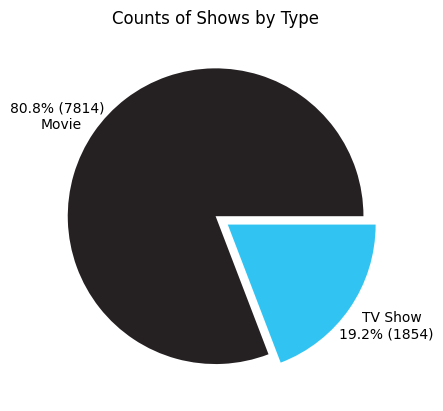

In [14]:
type=df.type.value_counts().index
type_values=df.type.value_counts().values
plt.pie(type_values,labels=type,autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(type_values) / 100),colors=["#252021","#31C4F3"],pctdistance=1.3,explode=(0,.1))
plt.title("Counts of Shows by Type")

**Insights**
- Chart illustrates the distribution of show types.
- Amazon Prime produces more movie than TV show

In [15]:
df.rating.unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

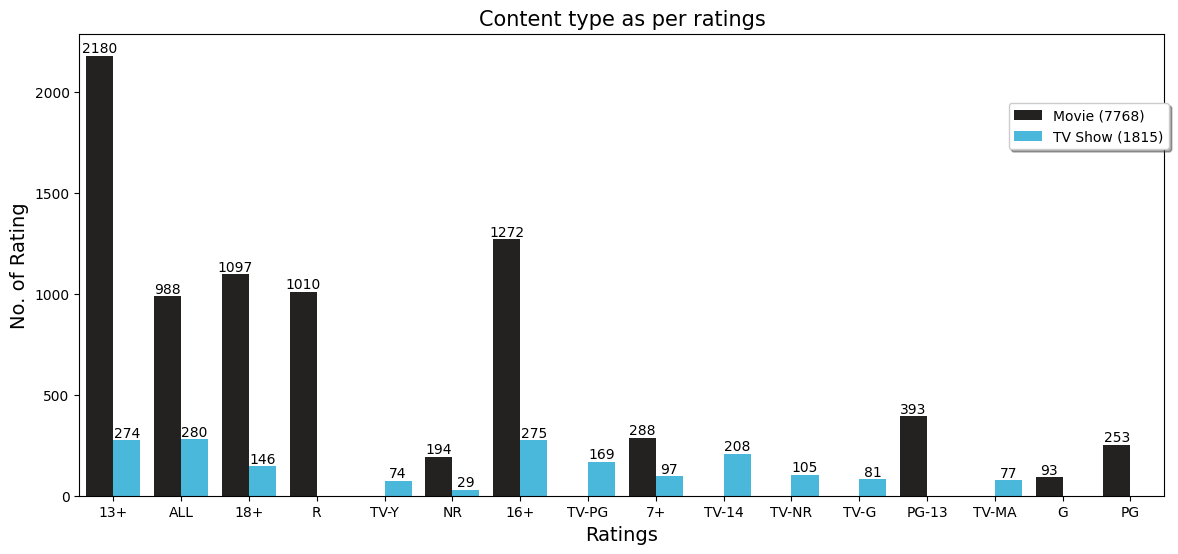

In [16]:
ratings_counts = df['rating'].value_counts()
custom_palette={"Movie":"#252021","TV Show":"#31C4F3"}

# Filter the DataFrame (df) based on ratings that occur more than 50 times

prime_filtered = df[df['rating'].isin(ratings_counts[ratings_counts > 50].index)]
plt.figure(figsize=(14, 6))
chart = sb.countplot(data = prime_filtered, x = 'rating', hue = 'type', palette = custom_palette)
plt.title('Content type as per ratings', fontsize = 15)
plt.xlabel('Ratings', fontsize = 14)
plt.ylabel('No. of Rating',fontsize = 14)

legend_labels = prime_filtered['type'].unique()
for label in legend_labels:
    total_count = prime_filtered[prime_filtered['type'] == label].shape[0]
    label_with_count = f"{label} ({total_count})"
    legend_labels[legend_labels == label] = label_with_count

chart.legend(labels=legend_labels, loc = 'center left', bbox_to_anchor=(0.850,0.80),
          ncol = 1, fancybox = True, shadow = True)
for bars in chart.containers:
    chart.bar_label(bars)

**Insights**
- Amazon Prime produces 13+,18+ and 16+ shows more than other rating shows

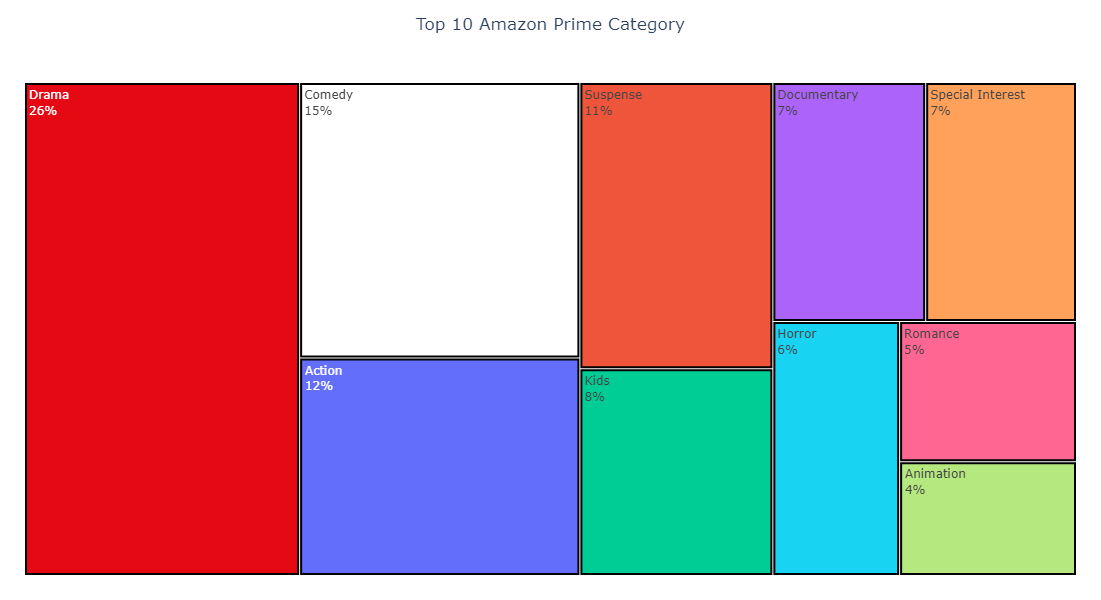

In [17]:
custom_palette={"Movie":"#252021","TV Show":"#31C4F3"}
top_genres = df['category'].str.split(', ', expand=True).stack().value_counts().head(10)
df_treemap = pd.DataFrame({'Genre': top_genres.index, 'Number of Releases': top_genres.values})
df_treemap['percent'] = df_treemap['Number of Releases'] / df_treemap['Number of Releases'].sum()
amazon_prime_color_palette = ["#E50914", "#FFFFFF"]
fig = go.Figure(go.Treemap(
    labels=df_treemap['Genre'],
    parents=[""] * len(df_treemap['Genre']),
    values=df_treemap['Number of Releases'],
    textinfo="label+percent entry",
    marker=dict(colors=amazon_prime_color_palette, line=dict(width=2, color='black'))  # Outer border
))
fig.update_layout(title='Top 10 Amazon Prime Category',title_x=0.5, margin=dict(l=20, r=20, t=60, b=20), width=800, height=600)
fig.show()

In [18]:
df["country"].value_counts().sort_values(ascending=False)

country
United States                          253
India                                  229
United Kingdom                          28
Canada                                  16
United Kingdom, United States           12
                                      ... 
United States, Switzerland               1
United States, Germany, Italy            1
United States, United Arab Emirates      1
Iran, France                             1
Italy, Spain                             1
Name: count, Length: 86, dtype: int64

In [19]:
df_top4 = df[(df["country"]=="United States") | (df["country"]=="India") | (df["country"]=="United Kingdom") | 
             (df["country"]=="Canada")]
df_top4.head(5)

type                 title        director  \
0  Movie   The Grand Seduction    Don McKellar   
1  Movie  Take Care Good Night    Girish Joshi   
2  Movie  Secrets of Deception     Josh Webber   
3  Movie    Pink: Staying True  Sonia Anderson   
4  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                 category  
0  March 30, 2021          2014    13+  113 min            Comedy, Drama  
1  March 30, 2021          2018    13+  110 min     Drama, International  
2  March 30, 2021          2017    13+   74 min  Action, Drama, Suspense  
3  March 30, 2021          2014    13+   69 min              Documentary  
4  March 30, 2021          1989    13+   45 min           Drama, Fantasy

Text(0.5, 1.0, 'Distribution of rating-based movies and shows in top 4 countries')

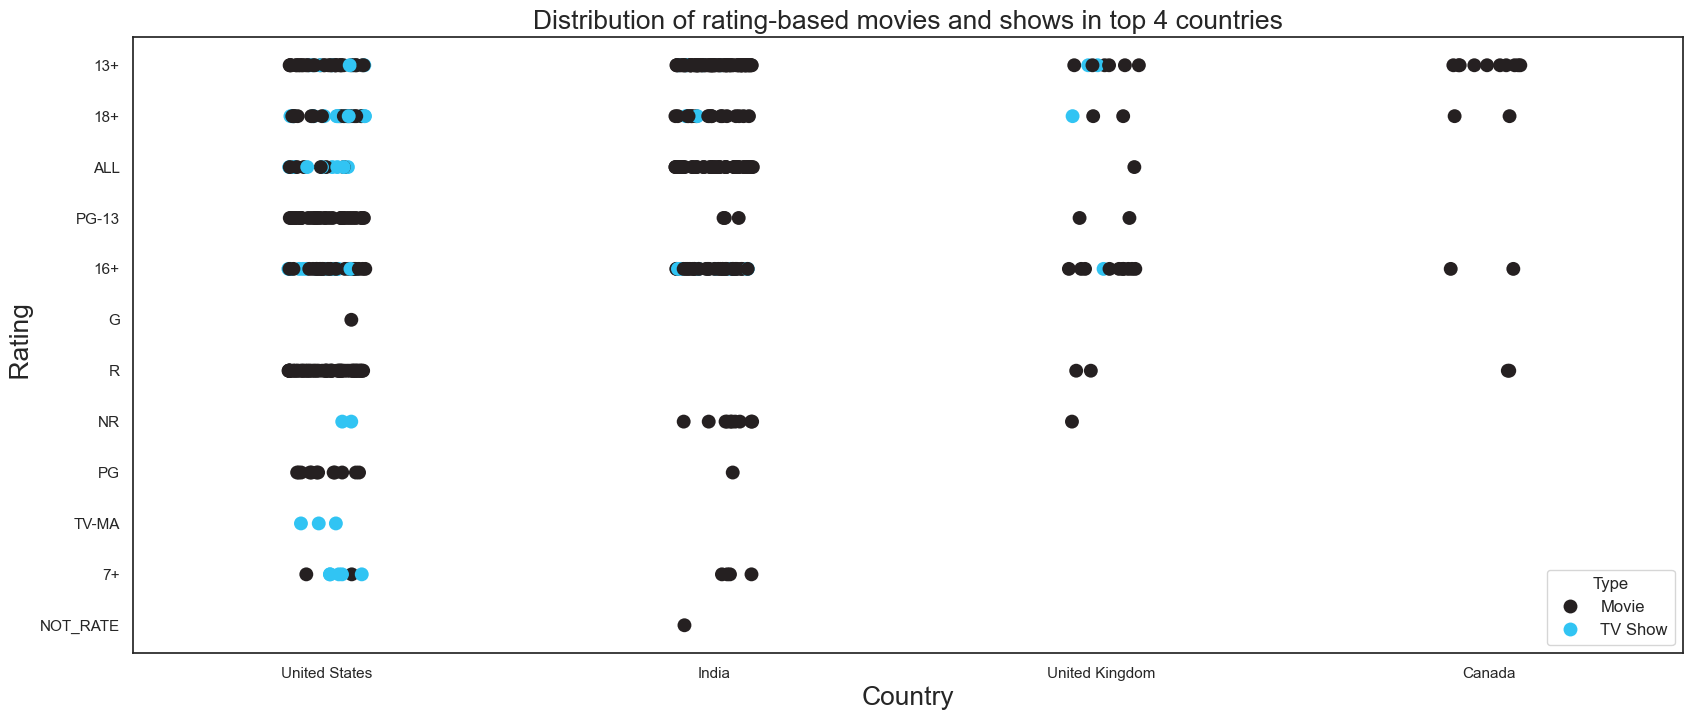

In [20]:
plt.figure(figsize=(20,8))
sb.set_theme(style = "white")
sb.stripplot(x="country" , y="rating" , hue="type", data=df_top4 , order=["United States" , "India" , "United Kingdom" , "Canada"],palette=custom_palette,size=10)
plt.xlabel('Country', fontsize = 19)
plt.ylabel(' Rating',fontsize = 19)
plt.legend(loc="lower right" , title="Type" , fontsize=12)
plt.title("Distribution of rating-based movies and shows in top 4 countries", fontsize=19)

**Insights:**
- In United States, Prime prdouces all kind of shows evenly in all type of rating 
- In india, Prime produces very less shows of PG,G,TV-MA,R rated show
- In United Kingdom,Prime produces very less shows of PG-13,G,R,PG,NR rated show
- In Canada, prime produces only 13+,18+,16+,G rated show

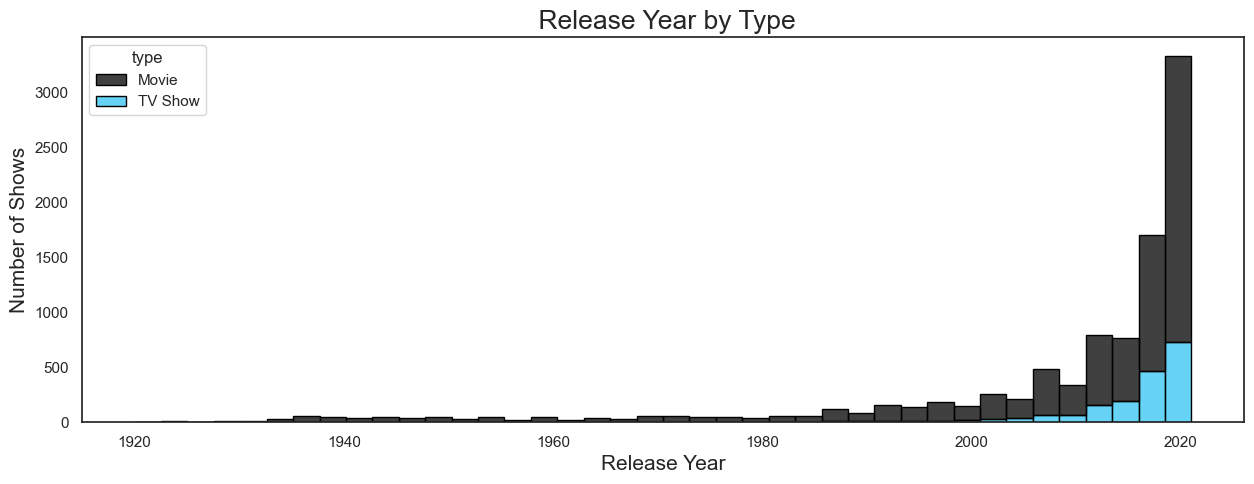

In [21]:
cp={"Movie":"black","TV Show":"#31C4F3"}

plt.figure(figsize=(15,5))
sb.histplot(data=df, x="release_year", hue="type", multiple="stack",palette=cp,binwidth=2.5,edgecolor="black")
plt.xlabel("Release Year",fontsize = 15)
plt.ylabel("Number of Shows",fontsize = 15)
plt.title(" Release Year by Type",fontsize = 19)
totals = df.groupby('type').size()

plt.show()


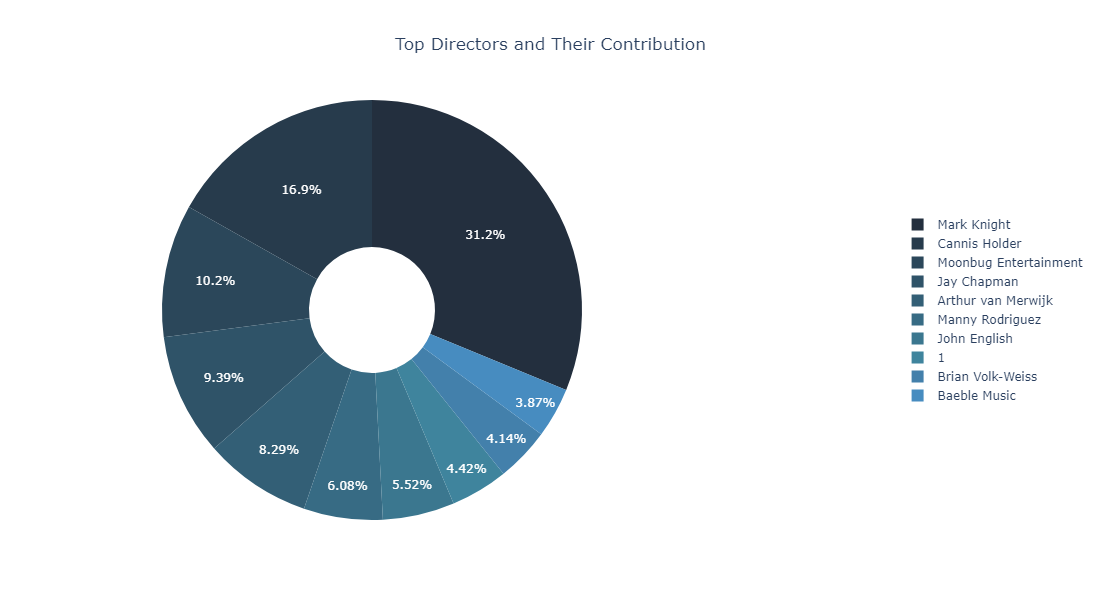

In [22]:
# Extract the count of each unique director and select the top 10 directors

data = df['director'].value_counts().iloc[1:11].to_dict()
netflix2 = pd.DataFrame(list(data.items()), columns=['Director', 'Count'])
blue_black_palette = ['#232f3e','#273b4c', '#2b475a','#2f5368','#335f76','#376b84',"#3b778f","#3f849d","#4380ab","#478cc0"]
p=["black","#31C4F3"]
fig = px.pie(netflix2, values='Count', names='Director', title='Top Directors and Their Contribution',
             hole=0.3, labels={'Count': 'Director Count'},color_discrete_sequence=blue_black_palette)
fig.update_layout(height=600, width=800)
fig.update_layout(legend=dict(x=1.4, y=0.5, traceorder='normal', orientation='v'))
fig.update_layout(title_x=0.5)
fig.show()

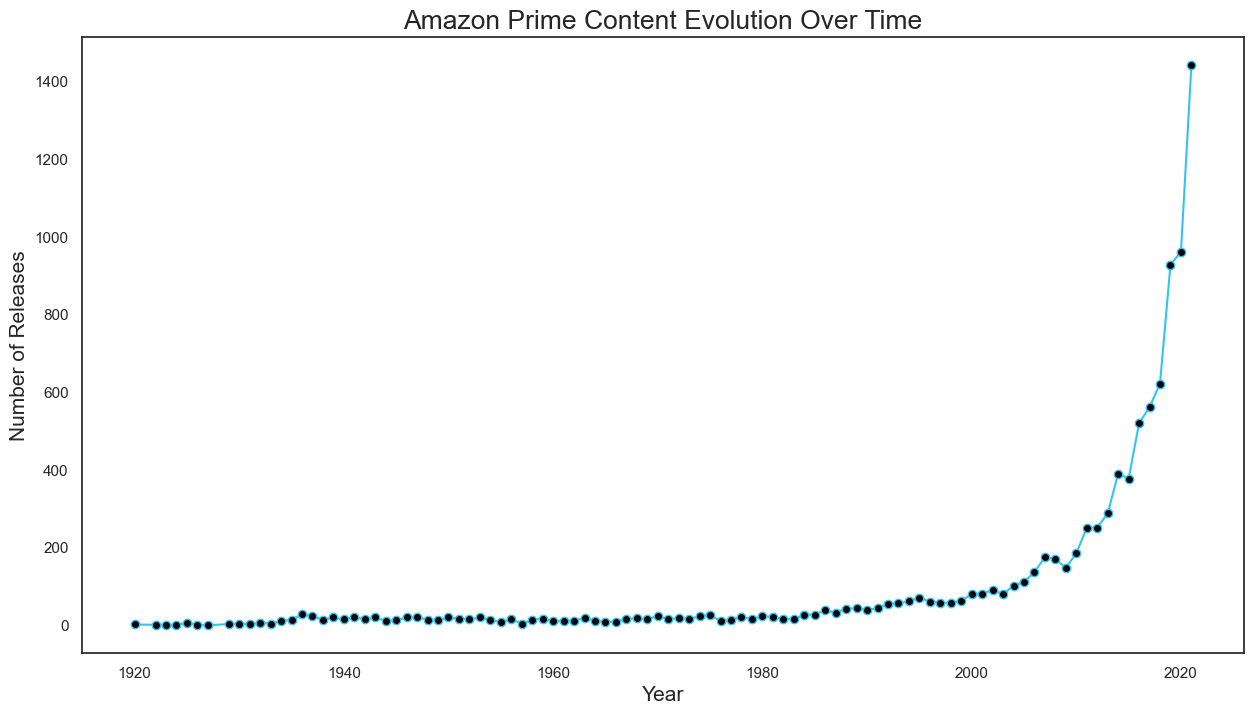

In [23]:
num_releases = df['release_year'].value_counts().sort_index()
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o',markerfacecolor='black',color='#31C4F3', figsize=(15, 8))
plt.title('Amazon Prime Content Evolution Over Time',fontsize = 19)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Number of Releases',fontsize = 15)
plt.show()

In [24]:
country_name = df[df['country']!='-']['country'].value_counts().head(4)
country_name

country
United States     253
India             229
United Kingdom     28
Canada             16
Name: count, dtype: int64

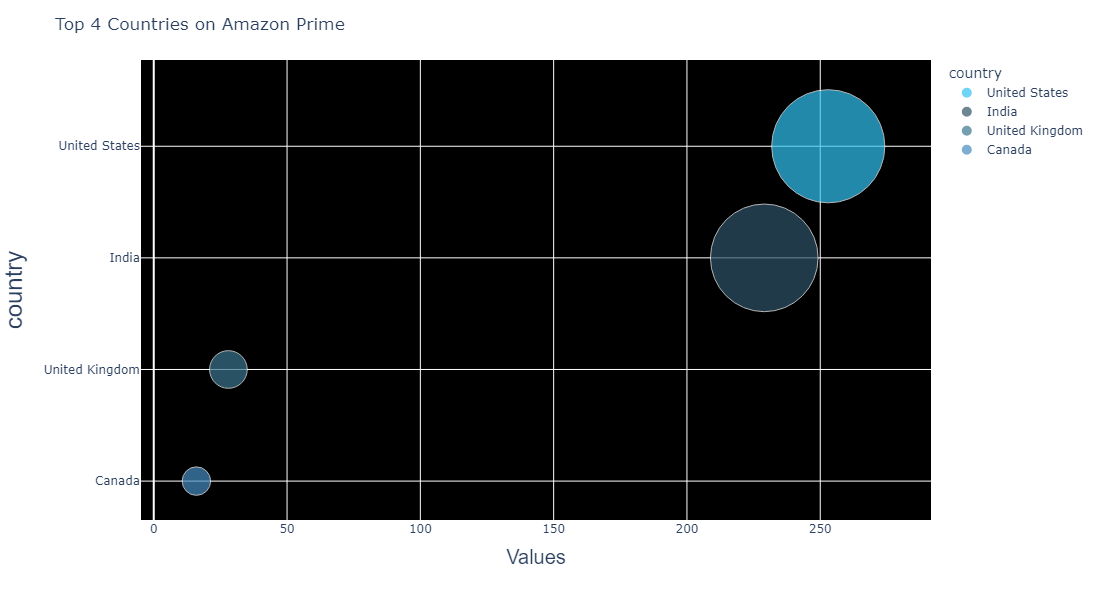

In [25]:
blue_black_palette = {
    'United States': '#31C4F3',
    'India': '#2f5368',
    'United Kingdom': '#3b778f',
    'Canada': '#478cc0'}
fig = px.scatter(
    country_name, x=country_name.values, y=country_name.index,
    color=country_name.index,
    color_discrete_map=blue_black_palette,
    size=country_name.values,  
    size_max=80,
    labels={'Values': country_name.values, 'Country': country_name.index},
)
fig.update_layout(title="Top 4 Countries on Amazon Prime",
    height=600,
    xaxis_title='Values',
    
    xaxis_title_font=dict(
        family='Arial',
        size=20,
    ),
    yaxis_title_font=dict(
        family='Arial',
        size=24,
    ), 
    plot_bgcolor='black',
)
fig.show()

# WordClouds of Title

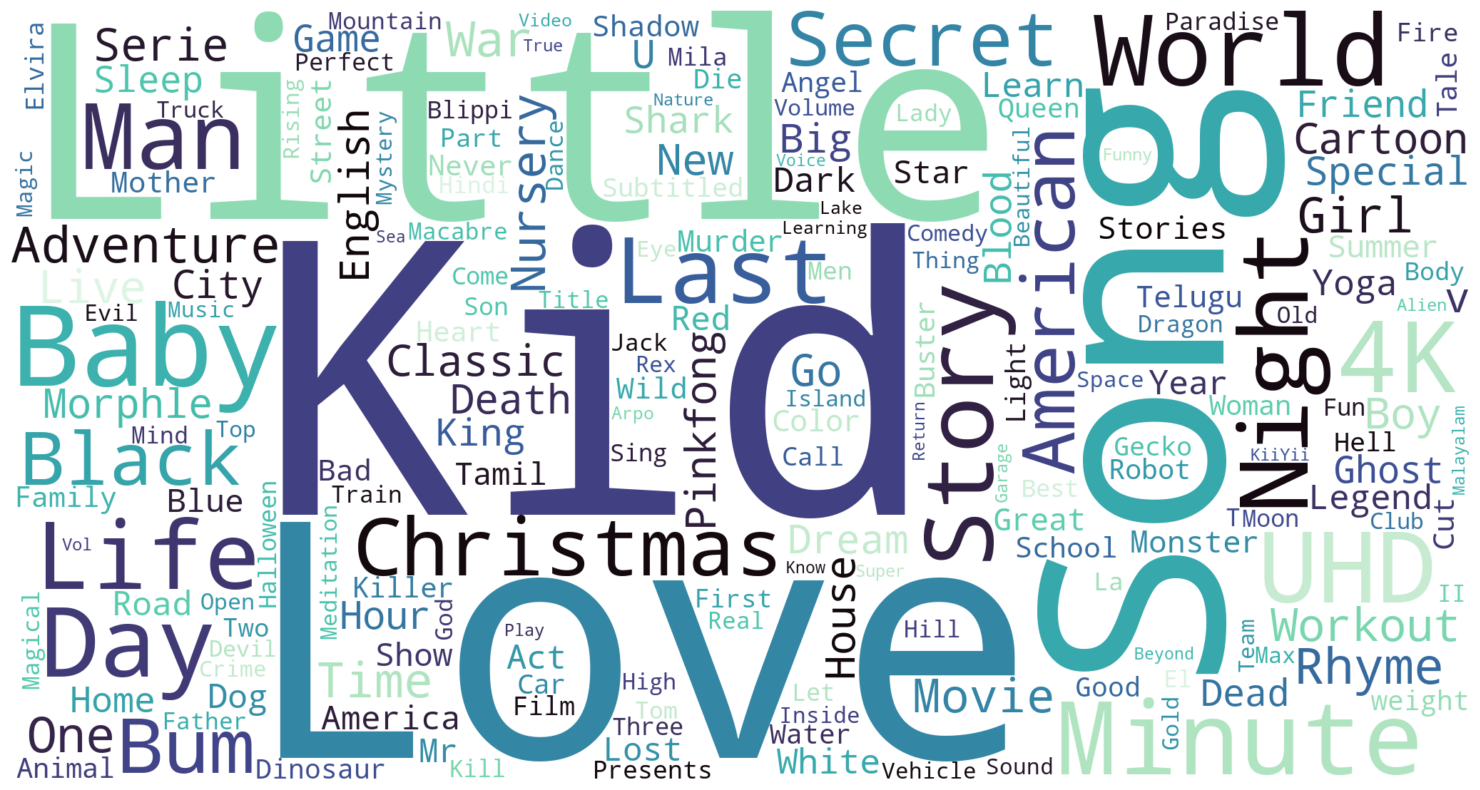

In [26]:

txt1 = " ".join(title for title in df.title)
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='mako').generate(txt1)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

# WordClouds of Cast

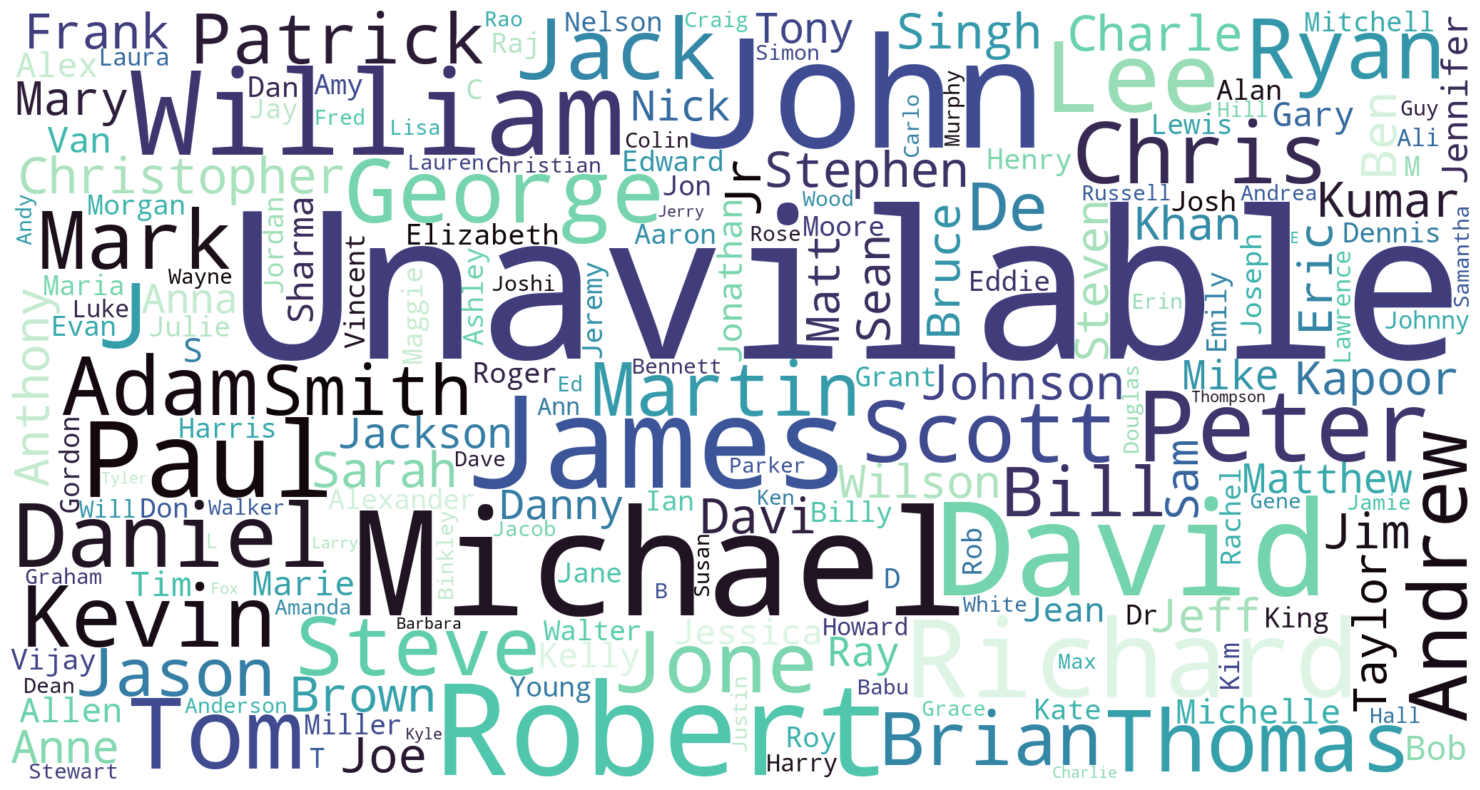

In [27]:
# creating the text variable
txt3 = " ".join(cast for cast in df.cast)
word_cloud3 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='mako').generate(txt3)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()